Get list of all classes

In [2]:
import csv

csvPath = 'AxieDetailsNew.csv'

listOfClasses = []
with open(csvPath, encoding="utf8") as myFile:
    heading = next(myFile)
    readerObj = list(csv.reader(myFile))

    xxx = 0
    for row in readerObj:
        if row[15] not in listOfClasses:
            listOfClasses.append(row[15])
        xxx += 1
        if xxx == 200000:
            break
    
print(listOfClasses)


['None', 'Beast', 'Aquatic', 'Bug', 'Plant', 'Bird', 'Reptile', 'Dusk', 'Mech', 'Dawn', '']


Remove badClasses from listOfClasses

In [3]:
badClasses = ['None', '']

print(listOfClasses)
listOfGoodClasses = [x for x in listOfClasses if x not in badClasses]
print(listOfGoodClasses)

['None', 'Beast', 'Aquatic', 'Bug', 'Plant', 'Bird', 'Reptile', 'Dusk', 'Mech', 'Dawn', '']
['Beast', 'Aquatic', 'Bug', 'Plant', 'Bird', 'Reptile', 'Dusk', 'Mech', 'Dawn']


Get dict of prices for all classes - creating dict

In [4]:
allClassesDict = {}

for x in range(len(listOfGoodClasses)):
    allClassesDict[listOfGoodClasses[x]]=[]

print(allClassesDict)

{'Beast': [], 'Aquatic': [], 'Bug': [], 'Plant': [], 'Bird': [], 'Reptile': [], 'Dusk': [], 'Mech': [], 'Dawn': []}


In [5]:
#TESTING
#allClassesDict[listOfGoodClasses[0]].append('one')
#allClassesDict[listOfGoodClasses[0]].append('two')
#allClassesDict

Get dict of prices for all classes - adding prices

In [6]:
#PriceRow should be PriceColumn, 
# but fuck it its 2AM
breedCountRow = 10
priceRow = 4
priceLastRow = 23
priceQuickRow = 24
priceReasonableRow = 25
pricePatientRow = 26
priceRows = [priceRow, priceLastRow, priceQuickRow, priceReasonableRow, pricePatientRow]
listOfNonPrices = ["This Axie ist not for sale", ""]

with open(csvPath, encoding="utf8") as myFile:
    heading = next(myFile)
    readerObj = list(csv.reader(myFile))


    xxx = 0
    #gets single row
    for row in readerObj:
        #tries all price columns
        for price in priceRows:
            if row[price] not in listOfNonPrices:
                if row[15] in listOfGoodClasses:
                    allClassesDict[listOfGoodClasses[listOfGoodClasses.index(row[15])]].append(row[price].replace(" WETH" ,""))
                break
        xxx += 1
        if xxx == 200000:
            break

#allClassesDict
print('Done!!')

Done!!


Graph it!

[7.427461660266983, 11.927716444450665, 12.306725692764529, 13.775742494863437, 2.6931149540933874, 7.408010316957772, 3.066409633333333, 0.32950199999999996, 35.5539564]
9
['Beast', 'Aquatic', 'Bug', 'Plant', 'Bird', 'Reptile', 'Dusk', 'Mech', 'Dawn']
9


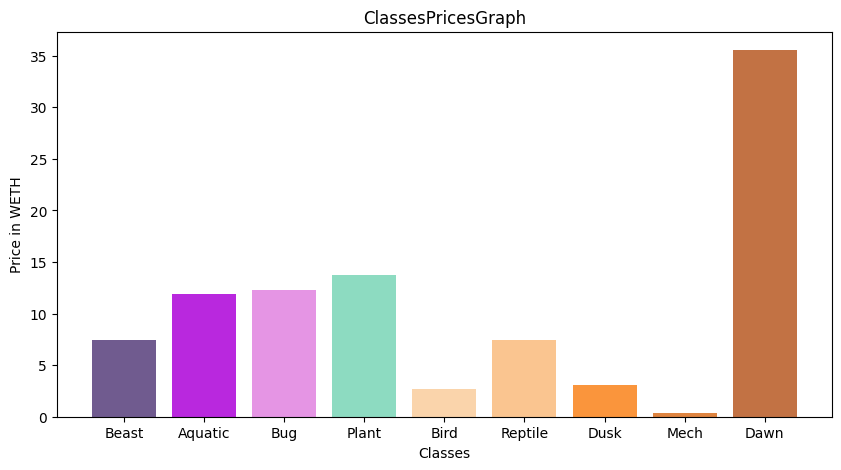

In [23]:
import matplotlib.pyplot as plt
import numpy as np

listOfNames = list(allClassesDict.keys())
listOfMeans = []
for item in allClassesDict:
    #convert value list from allClassesDict strings to list of floats and get mean
    listOfMeans.append(np.mean([float(i) for i in allClassesDict[item]]))

print(listOfMeans)
print(len(listOfMeans))
print(listOfNames)
print(len(listOfNames))

fig = plt.figure(figsize = (10, 5))
plt.bar(listOfNames, listOfMeans, color=['#705b8f', '#b928de', '#e595e4', '#8ddbc1', '#fad4ab', '#fac590', '#fa953c', '#de8440', '#c27244'])

plt.xlabel("Classes")
plt.ylabel("Price in WETH")
plt.title("ClassesPricesGraph")
plt.show()